First line is the name of the read

Then we get the reads of the genome

Then the + which is a placeholder

Then the quality score, which is a symbol and can be translated into a number which designates quality. You look at the quality table and then thransform the symbol into it's unicode code point (ASCII code) and substract 33.

In [1]:
def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    
    return sequences, qualities


In [2]:
seqs, quals = read_fastq("data/bioinformatics/SRR835775_1.first1000.fastq")

In [3]:
seqs[:5]

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA',
 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']

In [4]:
quals[:5]

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################',
 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########',
 '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A',
 '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################',
 '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']

In [5]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [6]:
phred33ToQ("#")

2

In [7]:
phred33ToQ("G")

38

In [8]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
            
    return hist

h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(h)
df.head()

,0
0,0
1,0
2,6178
3,0
4,0


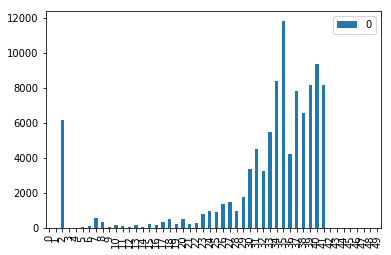

In [10]:
df.plot.bar()

In [32]:
def findGCByPOs(reads):
    gc = [0] * 100 # make the lists 100 numbers long
    totals = [0] * 100
    
    for read in reads:
        for i in range(len(read)):
            if read[i] == "C" or read[i] == "G":
                gc[i] += 1
            totals[i] += 1
        
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
            
    return gc

In [33]:
gc = findGCByPOs(seqs)
gc_df = pd.DataFrame(gc)
gc_df.head()
# plt.plot(range(len(gc)), gc)
# plt.show()

,0
0,0.486
1,0.535
2,0.574
3,0.569
4,0.580


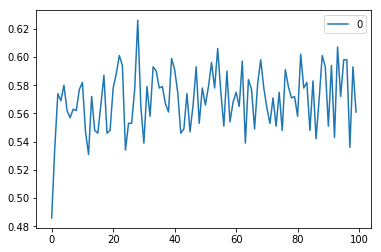

In [34]:
gc_df.plot.line()

In [21]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
    
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})
